# Data Challenge Report

In [4]:
from IPython.display import Image
Image(url="https://www.responsibilityreports.com/HostedData/CompanyHeader/NYSE_PBI.jpg", width=1000, height=50)

In [5]:
# library used
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# import SVM libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Normalizing
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action="ignore", category=FutureWarning)

In [6]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Data Understanding

## Data Overview

- Take a glimpse of the dataset with the first 5 rows and the last 5 rows.

In [7]:
data = pd.read_csv("D:/Pitney Bowes/Baurch Data Challenge 2022/train_updated.csv")
data_test = pd.read_csv(
    "D:/Pitney Bowes/Baurch Data Challenge 2022/test_for_submissions.csv"
)

<IPython.core.display.Javascript object>

In [8]:
# Create a function to glimpse the data
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())
    df.info()

<IPython.core.display.Javascript object>

In [9]:
glimpse(data)

40500 rows and 55 columns


,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/21,10/6/19
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/21,10/27/19
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/21,10/31/19
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/21,10/1/19
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/21,9/13/19


,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
40495,16284,4.97,5.81,5.01,29.44,-0.083333,-0.033333,7.13,5.41,5.60,...,2.782609,365.399130,354.915217,13.880435,23.077391,4162.913043,70.181818,36.957826,4/1/21,9/5/19
40496,49732,4.81,4.53,31.68,4.88,0.016667,-0.900000,4.71,3.99,49.68,...,1.066667,378.554667,374.952667,17.673333,28.495333,4181.600000,11.888889,46.168667,4/1/21,9/18/19
40497,43158,4.73,4.77,5.71,4.67,-0.020000,1.706667,3.83,3.48,4.51,...,2.227273,345.429091,342.216818,17.871818,29.766364,4157.045455,26.400000,47.638182,4/1/21,10/18/19
40498,5860,4.93,5.01,4.85,20.92,-0.103333,0.526667,3.35,4.30,4.12,...,6.750000,364.964000,362.155500,14.557000,22.894000,4171.650000,17.714286,37.451000,4/1/21,10/2/19
40499,20795,30.83,5.18,33.17,32.65,0.033333,0.060000,43.72,5.59,61.54,...,6.045455,345.897727,337.337727,21.834091,34.135000,4155.045455,30.857143,55.969091,4/1/21,9/16/19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

<IPython.core.display.Javascript object>

## Data Description

In [11]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [12]:
data1.describe()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,...,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,...,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462
std,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,...,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,...,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111
25%,16234.750000,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,...,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068
50%,27528.000000,5.770000,5.830000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,...,84.875000,17.097619,1.470588,351.109967,347.911440,16.201115,25.774365,4159.158948,16.500000,42.005895
75%,38785.250000,30.100000,30.730000,30.060000,29.600000,0.046667,0.060000,50.200000,51.212500,50.300000,...,95.200000,37.000000,2.353416,359.687861,356.837450,18.660114,30.476042,4166.800000,24.285714,49.115667
max,49999.000000,82.550000,98.890000,81.000000,81.890000,9.556667,17.913333,104.550000,110.560000,108.170000,...,145.333333,2013.000000,38.000000,410.957692,420.486000,34.016667,60.746667,4208.900000,418.916667,94.763333


<IPython.core.display.Javascript object>

- As we can see, **Charging_rate_lag3** and **charging_rate_lag7** have minimum of negative values. Therefore, we assume it is a techinical problem in recording the data, and will let those negative ones become null values.  
- Besides, we also see that **total_off_time** range from 0 to 2013, so we think it is worth considering for abnormal values. 

# Data Preparation

## 1. Dealing with outliers/abnormal data

### Replacing negative values of Charging_rate_lag3 and charging_rate_lag7 to NaN

- We will replace the negative values of **Charging_rate_lag3** and **charging_rate_lag7** with **Null** values, and then later we will fill them with suitable values

In [13]:
vars = ["charging_rate_lag3", "charging_rate_lag7"]
for var in vars:
    data1[var] = data1[var].mask(data1[var] < 0)

<IPython.core.display.Javascript object>

### Evaluating total_off_time

Text(0.5, 1.0, 'Box plot of variable Total_off_time')

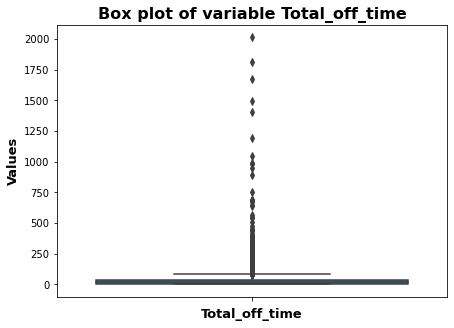

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(7, 5))
chart = sns.boxplot(y="total_off_time", data=data1)
chart.set_xlabel("Total_off_time", weight="bold", fontsize=13)
chart.set_ylabel("Values", weight="bold", fontsize=13)
chart.set_title("Box plot of variable Total_off_time", weight="bold", fontsize=16)

- Because **total_off_time** is proportional with the life of the devices from the date of being deployed to the date of last record. Therefore, it will be more reasonable to look at the **total_off_time** based on the life of devices. We think **total_off_time/life_of_device** would make a good indicator before evaluating for the abnormal here. We call this indicator as **total_off_life**
- **life_of_device** is calculated as: **LastRecord** - **Date Deployed**

In [15]:
data1["LastRecord"] = pd.to_datetime(data1["LastRecord"])
data1["Date Deployed"] = pd.to_datetime(data1["Date Deployed"])

<IPython.core.display.Javascript object>

In [16]:
data2 = data1.copy()

<IPython.core.display.Javascript object>

In [17]:
# Calculating time of the devices since deployed
data2["device_life"] = data1["LastRecord"] - data1["Date Deployed"]
data2["device_life"] = data2["device_life"].astype("timedelta64[D]")

# Calculating total_off_time/device_life since the day deployed
data2["time_off_life"] = data2["total_off_time"] / data2["device_life"]

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Box plot of variable Total_off_life after being transformed')

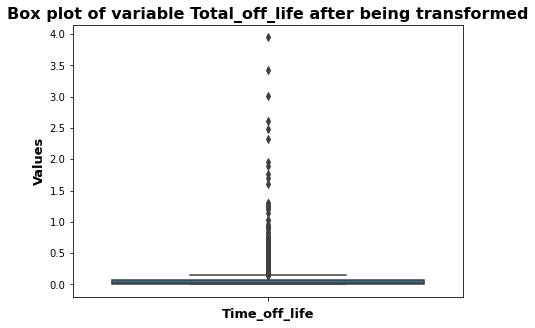

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(7, 5))
chart = sns.boxplot(y="time_off_life", data=data2)
chart.set_xlabel("Time_off_life", weight="bold", fontsize=13)
chart.set_ylabel("Values", weight="bold", fontsize=13)
chart.set_title(
    "Box plot of variable Total_off_life after being transformed",
    weight="bold",
    fontsize=16,
)

- It is observed that **Time_off_life** variable has outliers. So we decided to replace the outliers with values from percentile 5 to 95.
- As you can see in the figure below, the variable now has no outliers

In [19]:
# Computing 5th, 95th percentiles and replacing the outliers
lower_percentile = np.percentile(data2["time_off_life"], 5)
upper_percentile = np.percentile(data2["time_off_life"], 95)

# Replacing with lower and upper percentile values
data2["time_off_life"] = np.where(
    data2["time_off_life"] < lower_percentile, lower_percentile, data2["time_off_life"],
)
data2["time_off_life"] = np.where(
    data2["time_off_life"] > upper_percentile, upper_percentile, data2["time_off_life"],
)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Time_off_life after replacing outliers')

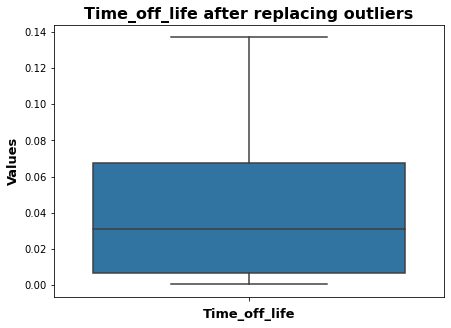

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(7, 5))
chart = sns.boxplot(y="time_off_life", data=data2)
chart.set_xlabel("Time_off_life", weight="bold", fontsize=13)
chart.set_ylabel("Values", weight="bold", fontsize=13)
chart.set_title(
    "Time_off_life after replacing outliers", weight="bold", fontsize=16,
)

## 2. Dealing with missing values

- After replacing the negative values in **charging_rate_lag7** and **charging_rate_lag3** with **null** values, we see that there are about 50% of the values are missing. Therefore, we believe the data is not trustful enough to put into the model. We decide to drop these 2 features.  
- Missing values of **avg_time_charging_lag14** and **avg_time_discharging_lag14** are about 16.5% each, which are the largest missing proportion. Therefore, we decide not to drop these features but use technique of filling missing values. 

### Missing table information

In [21]:
# Examining the missing values

missing_values = data2.isna().sum()
missing_values2 = data2.isna().sum() / len(data) * 100
df = pd.concat([missing_values, missing_values2], axis=1)
missing_table = df.rename(columns={0: "Missing Values", 1: "% of Total Values"})
missing_table2 = (
    missing_table[missing_table.iloc[:, :] != 0]
    .sort_values("% of Total Values", ascending=False)
    .round(1)
)
miss_tbl = missing_table2.dropna()
miss_tbl

,Missing Values,% of Total Values
charging_rate_lag7,20321.0,50.2
charging_rate_lag3,20039.0,49.5
avg_time_discharging_lag14,6668.0,16.5
avg_time_charging_lag14,6668.0,16.5
avg_time_discharging_lag13,4382.0,10.8
avg_time_charging_lag13,4382.0,10.8
avg_time_discharging_lag12,2757.0,6.8
avg_time_charging_lag12,2757.0,6.8
avg_time_discharging_lag11,1586.0,3.9
avg_time_charging_lag11,1586.0,3.9


<IPython.core.display.Javascript object>

In [22]:
# Drop columns: charging_rate_lag7 and charging_rate_lag3
data3 = data2.drop(["charging_rate_lag7", "charging_rate_lag3"], axis=1)

<IPython.core.display.Javascript object>

### Correlation matrix between variables

In [23]:
corr = data3.corr()
corr.style.background_gradient(cmap="coolwarm")

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,device_life,time_off_life
deviceid,1.000000,0.004142,-0.001142,0.002691,0.003504,0.004854,-0.000761,0.002166,0.004750,-0.007265,0.002634,-0.004251,0.000475,-0.004359,-0.002377,-0.004506,-0.004438,-0.000596,-0.001011,0.001588,0.000365,0.002816,0.004019,-0.003043,-0.002586,-0.004631,-0.002813,0.005479,0.004108,-0.005070,-0.004088,0.000988,-0.001249,0.007709,0.002769,-0.004402,-0.007273,-0.000034,0.003283,-0.002331,0.000911,0.000777,0.009035,-0.002188,0.001162,-0.000333,0.000704,0.001197,0.000564,-0.002132,0.001033,-0.005716,-0.000495
avg_time_charging_lag1,0.004142,1.000000,0.001707,0.001525,-0.005240,0.979988,0.001834,0.001580,-0.005232,0.009126,-0.001647,-0.014580,-0.004235,0.000620,0.001160,-0.005266,-0.005822,-0.006620,-0.006738,-0.001907,-0.001947,-0.000118,-0.001578,0.002459,0.002842,-0.002732,-0.003305,-0.005181,-0.004096,-0.006153,-0.004673,0.008429,0.008271,-0.051579,-0.001434,-0.002997,0.002863,0.057934,-0.006162,0.000509,-0.192945,-0.192962,-0.010313,-0.022071,-0.067691,-0.080069,0.241628,0.235666,-0.086113,-0.001742,0.238768,0.007481,-0.014469
avg_time_charging_lag2,-0.001142,0.001707,1.000000,-0.010682,-0.000641,0.001050,0.980808,-0.009903,0.000053,0.000430,-0.004200,-0.003520,0.002940,-0.004350,-0.004710,0.004742,0.002958,-0.000284,-0.000026,-0.000321,-0.001353,0.002342,0.005049,0.003042,0.002544,0.003173,0.003806,0.003829,0.002761,-0.007410,-0.007403,-0.003745,-0.005440,0.002864,-0.020310,-0.004661,0.004020,-0.002653,0.057512,0.006660,-0.193247,-0.193316,-0.006186,-0.007043,-0.074024,-0.088043,0.242112,0.236300,-0.090766,0.010125,0.239353,0.004778,-0.011727
avg_time_charging_lag3,0.002691,0.001525,-0.010682,1.000000,-0.005379,0.001107,-0.012405,0.981309,-0.005899,-0.004590,-0.000372,-0.001927,-0.002643,0.000967,0.001910,0.002626,0.003138,-0.006502,-0.005704,0.002673,0.003952,0.006199,0.006418,-0.004176,-0.004275,0.004701,0.004396,-0.003477,-0.002539,0.001963,0.003229,-0.003530,-0.003750,0.004181,-0.002073,-0.010424,0.006534,0.004819,0.000220,0.044430,-0.199668,-0.199595,-0.009667,-0.000146,-0.072953,-0.084776,0.242527,0.238656,-0.089027,0.011651,0.241052,-0.003265,-0.010976
avg_time_charging_lag7,0.003504,-0.005240,-0.000641,-0.005379,1.000000,-0.006494,0.001475,-0.004824,0.981128,-0.012199,0.004841,0.006221,0.004366,-0.001249,-0.001071,-0.001183,-0.001334,0.010348,0.008811,0.003174,0.003360,-0.004202,-0.002683,0.000376,0.001260,-0.002459,-0.002987,-0.002962,-0.004051,-0.004191,-0.004298,-0.009464,-0.008424,-0.000101,-0.001315,0.000033,-0.005085,-0.006233,0.008055,-0.007157,-0.189334,-0.189267,-0.010842,-0.016543,-0.070883,-0.082705,0.233331,0.229206,-0.089236,-0.001513,0.231647,0.004259,-0.016011
avg_time_discharging_lag1,0.004854,0.979988,0.001050,0.001107,-0.006494,1.000000,0.001424,0.001240,-0.006419,0.008516,-0.000178,-0.015220,-0.003886,0.000196,0.000756,-0.006411,-0.006557,-0.006503,-0.006568,-0.005290,-0

<IPython.core.display.Javascript object>

### Distribution of different variables having high missing value ratio

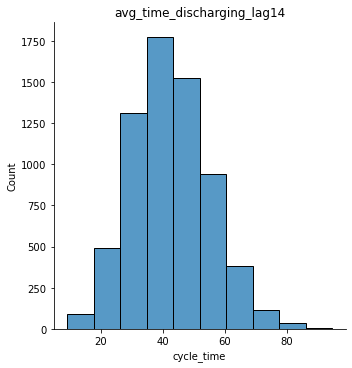

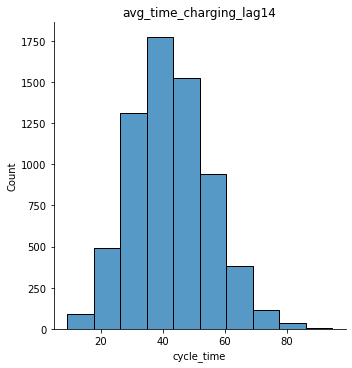

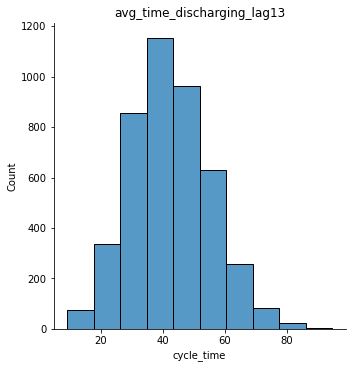

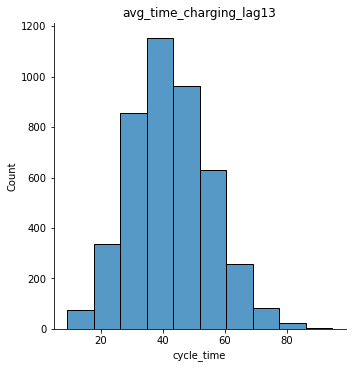

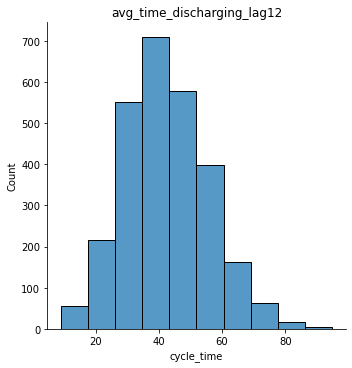

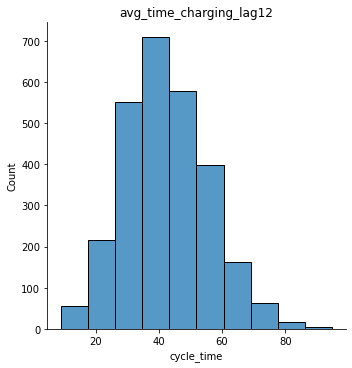

<IPython.core.display.Javascript object>

In [24]:
for i in list(miss_tbl.index[2:8]):
    distribution = data3[data3[i].isnull()]
    p = sns.displot(distribution.cycle_time, bins=10)
    p.set(title=f"{i}")

- The six variables with the most missing values have the strongest correlation with **cycle_time**, so intuitively, we will base on this variables to fill missing values for those 6 variables. 
- Among the four variables with the most missing values, the missing values are usually on devices whose **cycle_time** are between 30 and 60. Therefore, we will fill missing values with the median values within **cycle_time** from 30 to 60. 
- Besides, with other variables whose missing value proportions are below 6%, we will fill values normally with the corresponding median values calculated on the available data.   

In [25]:
data4 = data3.copy()

# avg_time_discharging_lag14, avg_time_charging_lag14, avg_time_discharging_lag13, avg_time_charging_lag13, avg_time_discharging_lag12, avg_time_charging_lag12

for col in list(miss_tbl.index[2:8]):
    # Impute with the median values
    data4[col] = data4[col].fillna(
        data4[(data4["cycle_time"] >= 30) & (data4["cycle_time"] <= 60)][col].median()
    )

# Filling missing values of the rest
for col2 in list(miss_tbl.index[8:]):
    # Impute with the median values
    data4[col2] = data4[col2].fillna(data4[col2].median())

<IPython.core.display.Javascript object>

### Data information after filling missing values

In [26]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   deviceid                     40500 non-null  int64         
 1   avg_time_charging_lag1       40500 non-null  float64       
 2   avg_time_charging_lag2       40500 non-null  float64       
 3   avg_time_charging_lag3       40500 non-null  float64       
 4   avg_time_charging_lag7       40500 non-null  float64       
 5   avg_time_discharging_lag1    40500 non-null  float64       
 6   avg_time_discharging_lag2    40500 non-null  float64       
 7   avg_time_discharging_lag3    40500 non-null  float64       
 8   avg_time_discharging_lag7    40500 non-null  float64       
 9   discharging_rate_lag3        40500 non-null  float64       
 10  discharging_rate_lag7        40500 non-null  float64       
 11  fail_7                       40500 non-nu

<IPython.core.display.Javascript object>

## 3. Examining the association between variables

### Examining relationship between avg_volt_change_charging vs. avg_volg_change_discharging
- There is obviously a linear association between **avg_volt_change_charging** vs **avg_volg_change_discharging**

Text(0.5, 1.0, 'Relationship between avg_volt_change_charging and avg_volt_change_discharging')

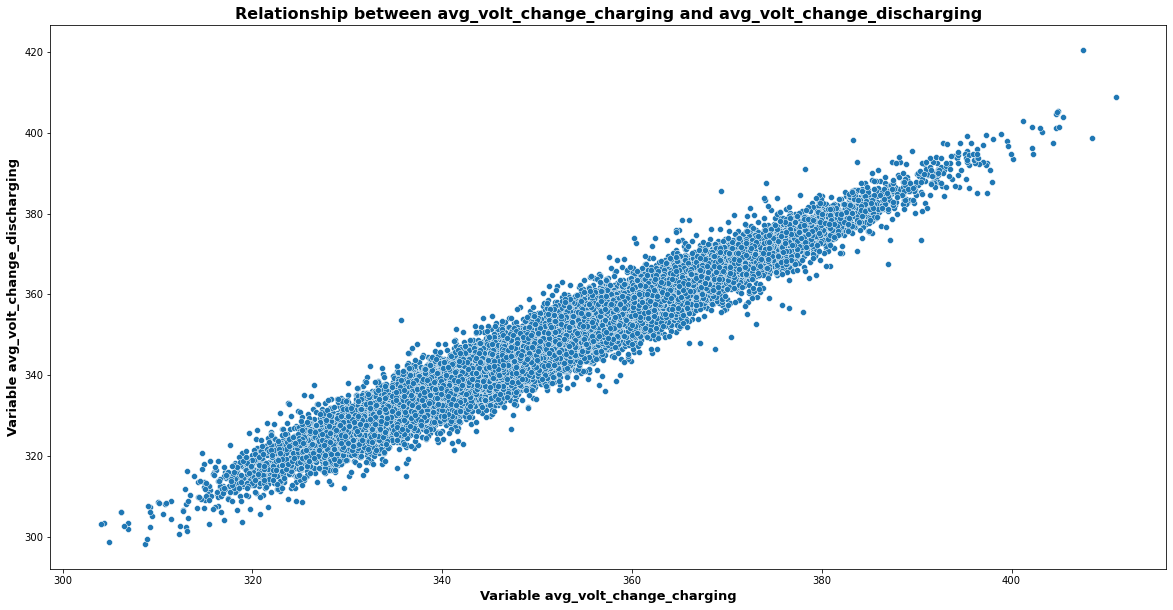

<IPython.core.display.Javascript object>

In [27]:
# avg_volt_change_charging vs #avg_volg_change_discharging

plt.figure(figsize=(20, 10))
chart = sns.scatterplot(
    data=data4, x="avg_volt_change_charging", y="avg_volt_change_discharging"
)
chart.set_xlabel("Variable avg_volt_change_charging", weight="bold", fontsize=13)
chart.set_ylabel("Variable avg_volt_change_discharging", weight="bold", fontsize=13)
chart.set_title(
    "Relationship between avg_volt_change_charging and avg_volt_change_discharging",
    weight="bold",
    fontsize=16,
)

### Examining relationship between dischargecycles and chargecycles
- There is obviously a linear relationship between **dischargecycles** and **chargecycles**. The correlation is very high.

Text(0.5, 1.0, 'Relationship between dischargecycles and chargecycles')

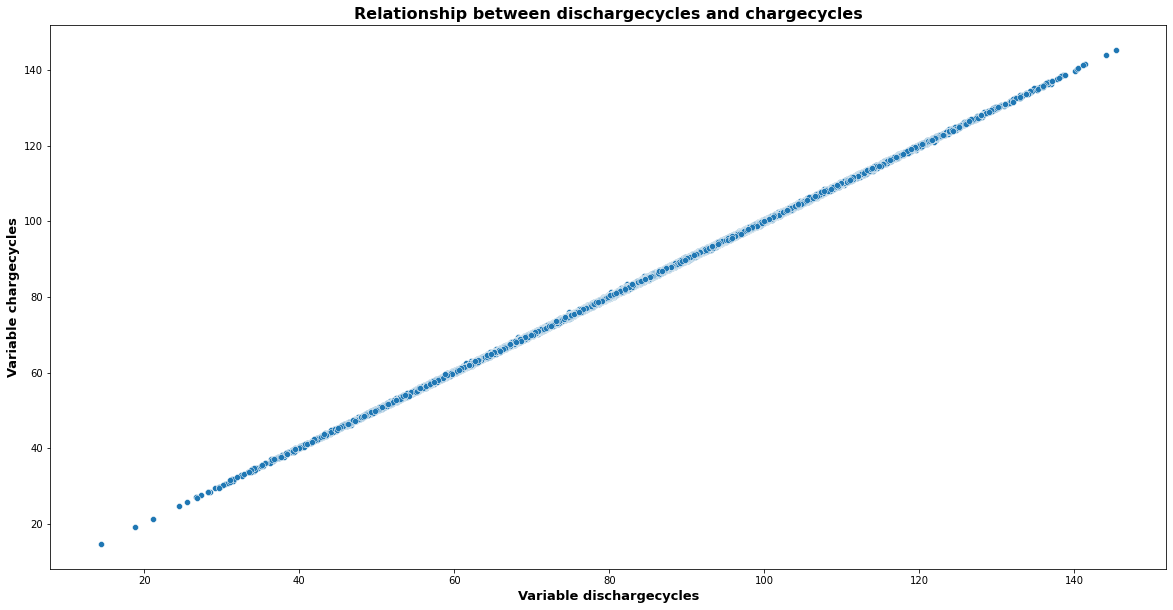

<IPython.core.display.Javascript object>

In [28]:
# dischargecycle vs #chargecycle
plt.figure(figsize=(20, 10))
chart = sns.scatterplot(data=data4, x="dischargecycles", y="chargecycles")
chart.set_xlabel("Variable dischargecycles", weight="bold", fontsize=13)
chart.set_ylabel("Variable chargecycles", weight="bold", fontsize=13)
chart.set_title(
    "Relationship between dischargecycles and chargecycles", weight="bold", fontsize=16,
)

### Examining Avg Charging Time over span of 14 days

In [29]:
# df with only avg charging time

avg_charging_time_df = data4.loc[
    :,
    [
        "avg_time_charging_lag14",
        "avg_time_charging_lag13",
        "avg_time_charging_lag12",
        "avg_time_charging_lag11",
        "avg_time_charging_lag10",
        "avg_time_charging_lag9",
        "avg_time_charging_lag8",
        "avg_time_charging_lag7",
        "avg_time_charging_lag6",
        "avg_time_charging_lag5",
        "avg_time_charging_lag4",
        "avg_time_charging_lag3",
        "avg_time_charging_lag2",
        "avg_time_charging_lag1",
        "fail_7",
    ],
]

<IPython.core.display.Javascript object>

In [30]:
new = avg_charging_time_df.groupby("fail_7").mean().dropna()

<IPython.core.display.Javascript object>

In [31]:
new = new.T

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Avg time charging over time')

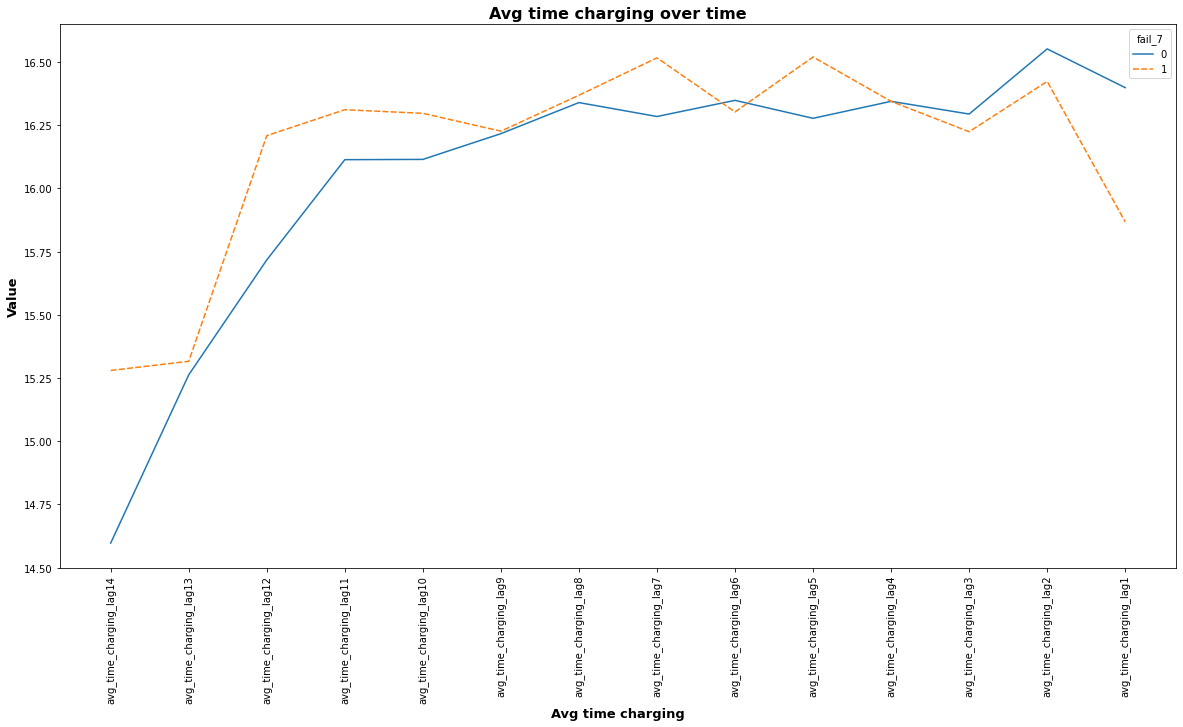

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(20, 10))
chart = sns.lineplot(data=new, color="darkorchid")
plt.xticks(rotation=90)
chart.set_xlabel("Avg time charging", weight="bold", fontsize=13)
chart.set_ylabel("Value", weight="bold", fontsize=13)
chart.set_title(
    "Avg time charging over time", weight="bold", fontsize=16,
)

### Examining Avg Charging Time over span of 14 days 
discharging: the time battery loosing voltage

In [33]:
#df with only avg discharging time

avg_discharging_time_df = data4.loc[:,['avg_time_discharging_lag14','avg_time_discharging_lag13','avg_time_discharging_lag12','avg_time_discharging_lag11','avg_time_discharging_lag10','avg_time_discharging_lag9','avg_time_discharging_lag8','avg_time_discharging_lag7','avg_time_discharging_lag6','avg_time_discharging_lag5','avg_time_discharging_lag4','avg_time_discharging_lag3','avg_time_discharging_lag2','avg_time_discharging_lag1','fail_7']]


<IPython.core.display.Javascript object>

In [34]:
avg_discharging_time_df.head()

,avg_time_discharging_lag14,avg_time_discharging_lag13,avg_time_discharging_lag12,avg_time_discharging_lag11,avg_time_discharging_lag10,avg_time_discharging_lag9,avg_time_discharging_lag8,avg_time_discharging_lag7,avg_time_discharging_lag6,avg_time_discharging_lag5,avg_time_discharging_lag4,avg_time_discharging_lag3,avg_time_discharging_lag2,avg_time_discharging_lag1,fail_7
0,6.19,6.17,6.16,6.07,5.94,5.93,5.92,39.12,79.33,31.02,5.85,15.70,91.70,4.37,0
1,6.19,35.90,18.93,49.02,72.46,4.12,59.38,8.25,24.33,4.77,20.37,6.16,6.53,62.67,0
2,41.29,3.50,4.37,6.23,76.36,58.87,31.82,14.02,5.73,6.06,40.69,4.14,5.65,5.13,0
3,4.16,18.62,3.82,4.15,30.51,4.22,5.32,73.53,52.99,3.73,3.74,60.86,76.37,3.93,0
4,37.29,47.76,5.16,4.64,6.52,40.57,45.04,6.29,76.42,24.21,82.70,3.80,71.44,4.69,0


<IPython.core.display.Javascript object>

In [35]:
new1 = avg_discharging_time_df.groupby("fail_7").mean().dropna()

<IPython.core.display.Javascript object>

In [36]:
new1 = new1.T

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Avg time discharging over time')

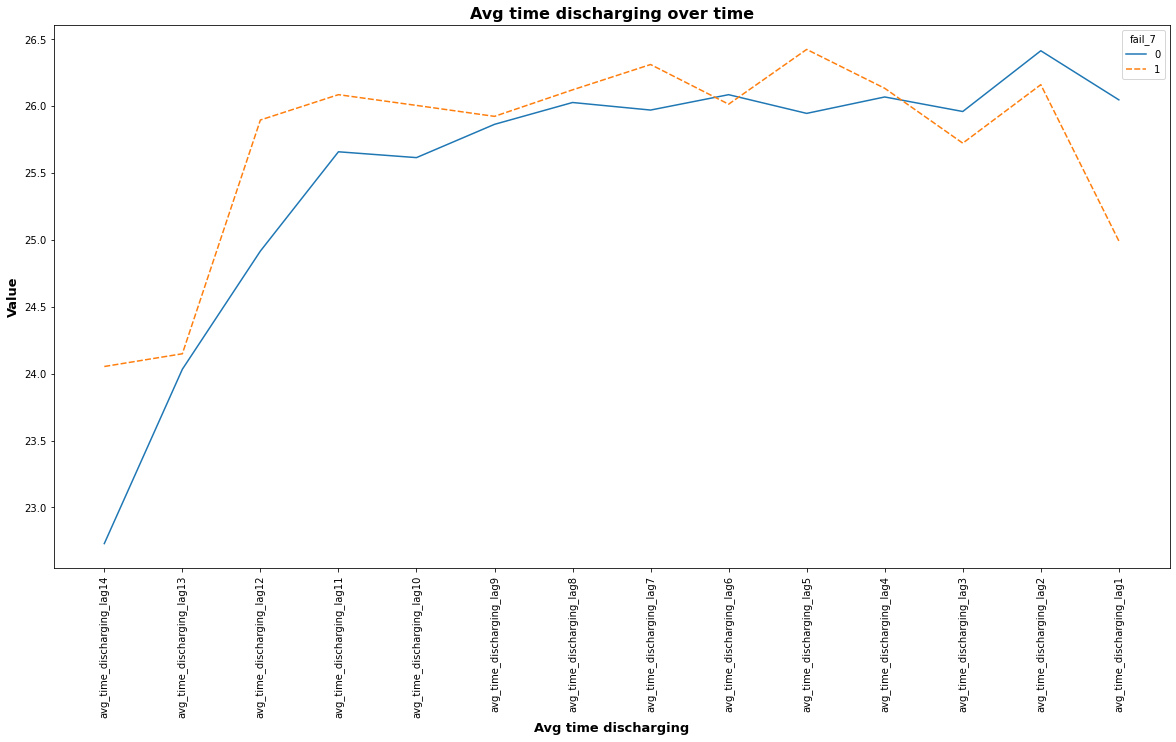

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(20, 10))
chart = sns.lineplot(data=new1, color="darkorchid")
plt.xticks(rotation=90)
chart.set_xlabel("Avg time discharging", weight="bold", fontsize=13)
chart.set_ylabel("Value", weight="bold", fontsize=13)
chart.set_title(
    "Avg time discharging over time", weight="bold", fontsize=16,
)

- As we can see, the patterns in plots **Avg time discharging over time** and **Avg time charging over time** are similar.

### Examining Charging Rate over time

discharging: the time battery loosing voltage

In [38]:
#df with only avg discharging time

charging_rate_df = data4.loc[:,['charging_rate_lag6','charging_rate_lag5','charging_rate_lag4','fail_7']]


<IPython.core.display.Javascript object>

In [39]:
new2 = charging_rate_df.groupby("fail_7").mean().dropna()

<IPython.core.display.Javascript object>

In [40]:
new2 = new2.T

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Charging rate over time')

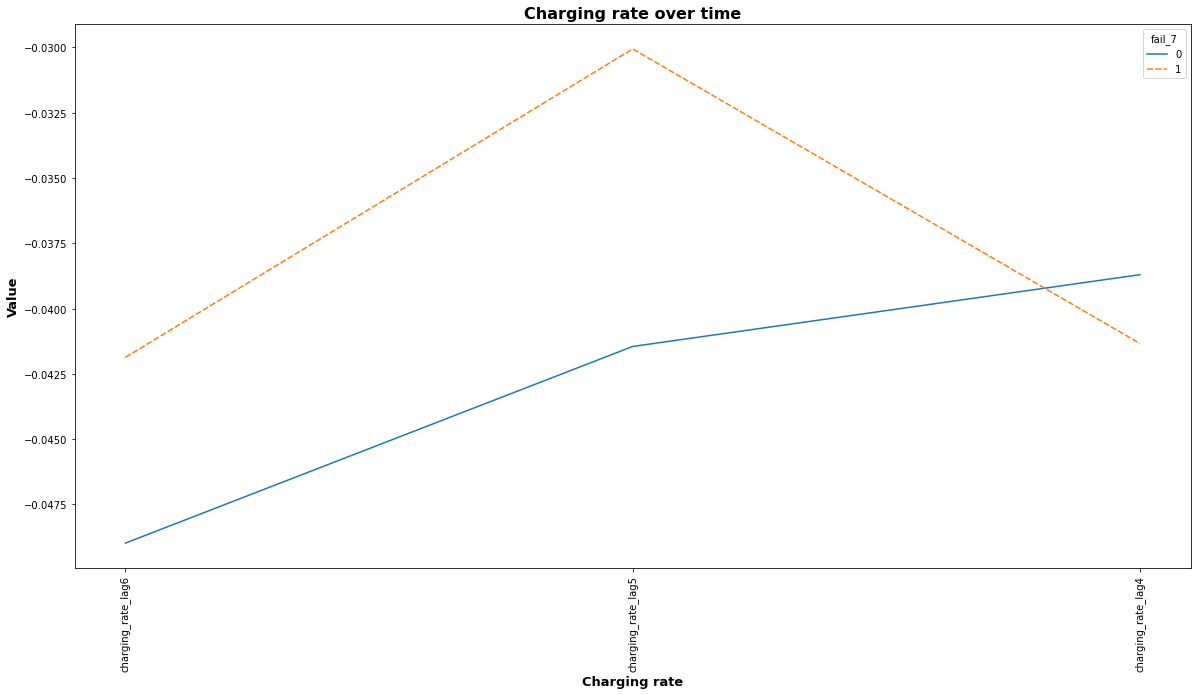

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(20, 10))
chart = sns.lineplot(data=new2, color="darkorchid")
plt.xticks(rotation=90)
chart.set_xlabel("Charging rate", weight="bold", fontsize=13)
chart.set_ylabel("Value", weight="bold", fontsize=13)
chart.set_title(
    "Charging rate over time", weight="bold", fontsize=16,
)

### Examining Discharging Rate over time

discharging: the time battery loosing voltage

In [42]:
#df with only avg discharging time

discharging_rate_df = data4.loc[:,['discharging_rate_lag8','discharging_rate_lag7','discharging_rate_lag6','discharging_rate_lag5','discharging_rate_lag4','discharging_rate_lag3','fail_7']]


<IPython.core.display.Javascript object>

In [43]:
discharging_rate_df.head()

,discharging_rate_lag8,discharging_rate_lag7,discharging_rate_lag6,discharging_rate_lag5,discharging_rate_lag4,discharging_rate_lag3,fail_7
0,-0.173333,0.033333,0.816667,1.573333,-0.360000,-1.163333,0
1,-0.103333,-2.653333,-3.063333,0.450000,-4.593333,-0.066667,0
2,0.216667,0.686667,0.000000,0.240000,-0.050000,-2.643333,0
3,-0.046667,0.033333,-0.293333,0.406667,0.013333,-0.166667,0
4,-1.790000,-1.030000,-0.006667,0.983333,-0.353333,0.066667,0


<IPython.core.display.Javascript object>

In [44]:
new3 = discharging_rate_df.groupby("fail_7").mean().dropna()

<IPython.core.display.Javascript object>

In [45]:
new3 = new3.T

<IPython.core.display.Javascript object>

Text(0.5, 1.0, "Machines' discharging rate over time")

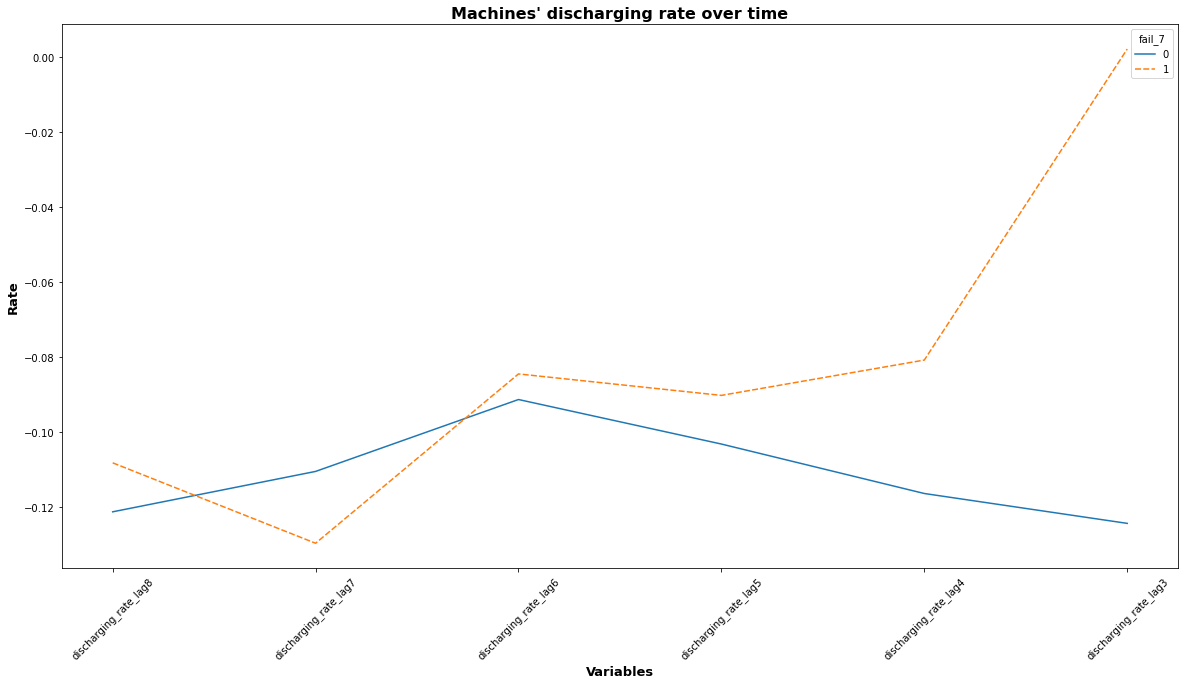

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(20, 10))
chart = sns.lineplot(data=new3, color="darkorchid")
plt.xticks(rotation=45)
chart.set_xlabel("Variables", weight="bold", fontsize=13)
chart.set_ylabel("Rate", weight="bold", fontsize=13)
chart.set_title("Machines' discharging rate over time", weight="bold", fontsize=16)

### Conclusion:
- There is a strong correlation between **discharging variables** and **charging variables**. Also, the trend over time of **discharging variables** and **charging variables** for failed and not failed machines experiences similar patterns. Therefore, 
we can get rid of either **discharging variables** or **charging variables**. In this case, we will remove variables of **avg_time_charging**.
- On the other hand, the **charging_rate** and **discharging_rate** of failed and not failed machines seems to have different patterns, so we assume they will have different effects on the machines. That's why we decided not to exclude these variables like the **avg_time_charging**.
- Get rid of the following variables:
['avg_time_charging_lag14','avg_time_charging_lag13','avg_time_charging_lag12','avg_time_charging_lag11','avg_time_charging_lag10','avg_time_charging_lag9','avg_time_charging_lag8','avg_time_charging_lag7','avg_time_charging_lag6','avg_time_charging_lag5','avg_time_charging_lag4','avg_time_charging_lag3','avg_time_charging_lag2','avg_time_charging_lag1']

In [47]:
data5 = data4.drop(
    [
        "deviceid",
        "Date Deployed",
        "LastRecord",
        "avg_time_charging",
        "avg_time_charging_lag14",
        "avg_time_charging_lag13",
        "avg_time_charging_lag12",
        "avg_time_charging_lag11",
        "avg_time_charging_lag10",
        "avg_time_charging_lag9",
        "avg_time_charging_lag8",
        "avg_time_charging_lag7",
        "avg_time_charging_lag6",
        "avg_time_charging_lag5",
        "avg_time_charging_lag4",
        "avg_time_charging_lag3",
        "avg_time_charging_lag2",
        "avg_time_charging_lag1",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [48]:
data6 = data5.copy()

<IPython.core.display.Javascript object>

## 4. Dealing with imbalanced data

- The plot below shows the total number of failed and not-failed machines in train data. As we can see, the number of failed machines is much greater then the number of not-failed machines. So in order to prevent the misclassification when running models, we decided to fix the imbalanced data. 
- The method used is undersampling, in which it will downsize the majority class to balance with the minority class.

<AxesSubplot:>

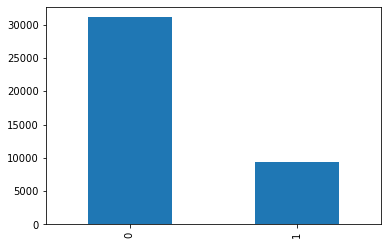

<IPython.core.display.Javascript object>

In [49]:
data6["fail_7"].value_counts().plot(kind="bar")

In [50]:
# Separating the independent variables from dependent variables
X = data6.drop("fail_7", axis=1)
y = data5.iloc[:, 6]

<IPython.core.display.Javascript object>

In [51]:
# Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<IPython.core.display.Javascript object>

**Summarize class distribution**

In [52]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({0: 24869, 1: 7531})


<IPython.core.display.Javascript object>

In [53]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy="majority")

<IPython.core.display.Javascript object>

In [54]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

**Summarize class distribution after undersampling of ytrain**

In [55]:
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0: 7531, 1: 7531})


<IPython.core.display.Javascript object>

In [56]:
model = SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

<IPython.core.display.Javascript object>

**Performance of undersampling**

In [57]:
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

ROC AUC score for undersampled data:  0.569857340280341


<IPython.core.display.Javascript object>

**Fit to the data**

In [58]:
X_use, y_use = undersample.fit_resample(X, y)

<IPython.core.display.Javascript object>

**Summarize class distribution after undersampling of y**

In [59]:
print("After undersampling: ", Counter(y_use))

After undersampling:  Counter({0: 9401, 1: 9401})


<IPython.core.display.Javascript object>

**Information of X variables after undersampling**

In [60]:
X_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18802 entries, 0 to 18801
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_time_discharging_lag1    18802 non-null  float64
 1   avg_time_discharging_lag2    18802 non-null  float64
 2   avg_time_discharging_lag3    18802 non-null  float64
 3   avg_time_discharging_lag7    18802 non-null  float64
 4   discharging_rate_lag3        18802 non-null  float64
 5   discharging_rate_lag7        18802 non-null  float64
 6   charge_cycle_time_below_12   18802 non-null  bool   
 7   avg_time_discharging_lag4    18802 non-null  float64
 8   avg_time_discharging_lag5    18802 non-null  float64
 9   avg_time_discharging_lag6    18802 non-null  float64
 10  avg_time_discharging_lag8    18802 non-null  float64
 11  avg_time_discharging_lag9    18802 non-null  float64
 12  avg_time_discharging_lag10   18802 non-null  float64
 13  avg_time_dischar

<IPython.core.display.Javascript object>

# Feature engineering

## Get dummy for "charge_cycle_time_below_12" variable

- Since the data type of **charge_cycle_time_below_12** is not numerical, we transformed the variable into a dummy one. 

In [61]:
data6 = X_use.drop("charge_cycle_time_below_12", axis=1)

<IPython.core.display.Javascript object>

In [62]:
columnsToEncode = X_use.select_dtypes(include=[bool]).columns

<IPython.core.display.Javascript object>

In [63]:
X_use1 = pd.get_dummies(X_use, columns=columnsToEncode, drop_first=True)

<IPython.core.display.Javascript object>

## Calculating VIF

- After checking the bivariate correlations between variables, we want to see if there is multicollinearity in the selected features. That's why we use VIF to detect the multicollinearity. Variables with VIF > 10 will be excluded from the model 

In [64]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

<IPython.core.display.Javascript object>

**VIF table**

In [65]:
data7_X = calc_vif(X_use1)

<IPython.core.display.Javascript object>

In [66]:
data7_X

,variables,VIF
0,avg_time_discharging_lag1,2.226018
1,avg_time_discharging_lag2,2.227510
2,avg_time_discharging_lag3,2.233821
3,avg_time_discharging_lag7,2.247457
4,discharging_rate_lag3,1.013887
5,discharging_rate_lag7,1.017526
6,avg_time_discharging_lag4,2.255378
7,avg_time_discharging_lag5,2.248130
8,avg_time_discharging_lag6,2.245632
9,avg_time_discharging_lag8,2.228071


<IPython.core.display.Javascript object>

- As VIF of **"chargecycles", "dischargecycles", "avg_volt_change_charging", "avg_volt_change_discharging", "avg_time_discharging", "max_voltage_day", "cycle_time", "device_life"** are greater than 10, there is suggested highly collinear relationships of these variables to other variables. Therefore, we consider to drop these features. 

In [67]:
data8_X = X_use1.drop(
    [
        "chargecycles",
        "dischargecycles",
        "avg_volt_change_charging",
        "avg_volt_change_discharging",
        "avg_time_discharging",
        "max_voltage_day",
        "cycle_time",
        "device_life",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

**Data information after dropping**

In [68]:
data8_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18802 entries, 0 to 18801
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   avg_time_discharging_lag1        18802 non-null  float64
 1   avg_time_discharging_lag2        18802 non-null  float64
 2   avg_time_discharging_lag3        18802 non-null  float64
 3   avg_time_discharging_lag7        18802 non-null  float64
 4   discharging_rate_lag3            18802 non-null  float64
 5   discharging_rate_lag7            18802 non-null  float64
 6   avg_time_discharging_lag4        18802 non-null  float64
 7   avg_time_discharging_lag5        18802 non-null  float64
 8   avg_time_discharging_lag6        18802 non-null  float64
 9   avg_time_discharging_lag8        18802 non-null  float64
 10  avg_time_discharging_lag9        18802 non-null  float64
 11  avg_time_discharging_lag10       18802 non-null  float64
 12  avg_time_dischargi

<IPython.core.display.Javascript object>

## Feature Scaling and Normalization

- After splitting the train and test set, we scaled the continuous features.

In [69]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data8_X, y_use, test_size=0.20)

<IPython.core.display.Javascript object>

In [70]:
data9_X = data8_X.iloc[:, 0:27]
sc = StandardScaler()
cont_vars = list(data9_X)
cat_var = ["charge_cycle_time_below_12_True"]
# Scaling only continuous columns
cols_to_scale = cont_vars
sc_X_train = sc.fit_transform(X_train1[cols_to_scale])
# Converting from array to dataframe and naming the respective features/columns
sc_X_train = pd.DataFrame(data=sc_X_train, columns=cols_to_scale)

<IPython.core.display.Javascript object>

In [71]:
sc_X_train = pd.concat(
    [sc_X_train, X_train1["charge_cycle_time_below_12_True"].reset_index()], axis=1
).drop(["index"], axis=1)

<IPython.core.display.Javascript object>

**Information of data after normalizing**

In [72]:
sc_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15041 entries, 0 to 15040
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   avg_time_discharging_lag1        15041 non-null  float64
 1   avg_time_discharging_lag2        15041 non-null  float64
 2   avg_time_discharging_lag3        15041 non-null  float64
 3   avg_time_discharging_lag7        15041 non-null  float64
 4   discharging_rate_lag3            15041 non-null  float64
 5   discharging_rate_lag7            15041 non-null  float64
 6   avg_time_discharging_lag4        15041 non-null  float64
 7   avg_time_discharging_lag5        15041 non-null  float64
 8   avg_time_discharging_lag6        15041 non-null  float64
 9   avg_time_discharging_lag8        15041 non-null  float64
 10  avg_time_discharging_lag9        15041 non-null  float64
 11  avg_time_discharging_lag10       15041 non-null  float64
 12  avg_time_dischargi

<IPython.core.display.Javascript object>

In [73]:
sc_X_test = sc.fit_transform(X_test1[cols_to_scale])
sc_X_test = pd.DataFrame(data=sc_X_test, columns=cols_to_scale)

<IPython.core.display.Javascript object>

In [74]:
sc_X_test = pd.concat(
    [sc_X_test, X_test1["charge_cycle_time_below_12_True"].reset_index()], axis=1
).drop("index", axis=1)

<IPython.core.display.Javascript object>

In [75]:
sc_X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   avg_time_discharging_lag1        3761 non-null   float64
 1   avg_time_discharging_lag2        3761 non-null   float64
 2   avg_time_discharging_lag3        3761 non-null   float64
 3   avg_time_discharging_lag7        3761 non-null   float64
 4   discharging_rate_lag3            3761 non-null   float64
 5   discharging_rate_lag7            3761 non-null   float64
 6   avg_time_discharging_lag4        3761 non-null   float64
 7   avg_time_discharging_lag5        3761 non-null   float64
 8   avg_time_discharging_lag6        3761 non-null   float64
 9   avg_time_discharging_lag8        3761 non-null   float64
 10  avg_time_discharging_lag9        3761 non-null   float64
 11  avg_time_discharging_lag10       3761 non-null   float64
 12  avg_time_discharging

<IPython.core.display.Javascript object>

# Modelling

## Fitting train data
- We choose to fit data to different classification models, and select the model with the best accuracy scores. 

## Model performances
- Model with the best accuracy score is RandomForest. Its accuracy score of 0.672162 

In [76]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(sc_X_train, y_train1)
# Predicting the Test set results
y_pred = classifier.predict(sc_X_test)
# Evaluate results
acc = accuracy_score(y_test1, y_pred)
prec = precision_score(y_test1, y_pred)
rec = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
results = pd.DataFrame(
    [["Logistic Regression", acc, prec, rec, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)

<IPython.core.display.Javascript object>

In [77]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(sc_X_train, y_train1)
# Predicting the Test set results y_pred = classifier.predict(X_test)
y_pred = classifier.predict(sc_X_test)
# Evaluate results
acc = accuracy_score(y_test1, y_pred)
prec = precision_score(y_test1, y_pred)
rec = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
model_results = pd.DataFrame(
    [["SVM (Linear)", acc, prec, rec, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)

results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)


<IPython.core.display.Javascript object>

In [78]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(n_neighbors=15, metric="minkowski", p=2)
classifier.fit(sc_X_train, y_train1)
# Predicting the Test set results y_pred = classifier.predict(X_test)
y_pred = classifier.predict(sc_X_test)
# Evaluate results
acc = accuracy_score(y_test1, y_pred)
prec = precision_score(y_test1, y_pred)
rec = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
model_results = pd.DataFrame(
    [["KNeighbors", acc, prec, rec, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)


<IPython.core.display.Javascript object>

In [79]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel="rbf", random_state=0)
classifier.fit(sc_X_train, y_train1)
y_pred = classifier.predict(sc_X_test)
# Evaluate results
acc = accuracy_score(y_test1, y_pred)
prec = precision_score(y_test1, y_pred)
rec = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
model_results = pd.DataFrame(
    [["Kernel SVM", acc, prec, rec, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)


<IPython.core.display.Javascript object>

In [80]:
# Fitting Naive Bayes to the Training set:
classifier = GaussianNB()
classifier.fit(sc_X_train, y_train1)
y_pred = classifier.predict(sc_X_test)
# Evaluate results
acc = accuracy_score(y_test1, y_pred)
prec = precision_score(y_test1, y_pred)
rec = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
model_results = pd.DataFrame(
    [["Naive Bayes", acc, prec, rec, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)


<IPython.core.display.Javascript object>

In [81]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(sc_X_train, y_train1)
y_pred = classifier.predict(sc_X_test)
# Evaluate results
acc = accuracy_score(y_test1, y_pred)
prec = precision_score(y_test1, y_pred)
rec = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
model_results = pd.DataFrame(
    [["Decision Tree", acc, prec, rec, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)


<IPython.core.display.Javascript object>

In [82]:
# Fitting Random Forest to the Training set:
classifier = RandomForestClassifier(
    n_estimators=72, criterion="entropy", random_state=0
)
classifier.fit(sc_X_train, y_train1)
y_pred = classifier.predict(sc_X_test)
# Evaluate results
acc = accuracy_score(y_test1, y_pred)
prec = precision_score(y_test1, y_pred)
rec = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)

model_results = pd.DataFrame(
    [["Random Forest", acc, prec, rec, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
6        Random Forest  0.685988   0.698795  0.687629  0.693167
0          Naive Bayes  0.669503   0.645999  0.794845  0.712734
1  Logistic Regression  0.679075   0.642109  0.853608  0.732906
2         SVM (Linear)  0.678543   0.641502  0.854124  0.732700
3           Kernel SVM  0.671896   0.641426  0.825258  0.721821
4        Decision Tree  0.595055   0.613377  0.581443  0.596983
5           KNeighbors  0.565541   0.569231  0.648454  0.606265


<IPython.core.display.Javascript object>

# Evaluating

## Fitting the model with the highest score of accuracy: Random Forrest

In [83]:
accuracies = cross_val_score(estimator=classifier, X=sc_X_train, y=y_train1, cv=10)
print(
    "Random Forest Classifier Accuracy:%0.2f (+/- %0.2f)"
    % (accuracies.mean(), accuracies.std() * 2)
)

Random Forest Classifier Accuracy:0.67 (+/- 0.02)


<IPython.core.display.Javascript object>

- Therefore, our k-fold Cross Validation results indicate that we would have an accuracy anywhere between 65% to 69% while running this model on any test set.  
- This is not the best model as the accuracy score is still low. 

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

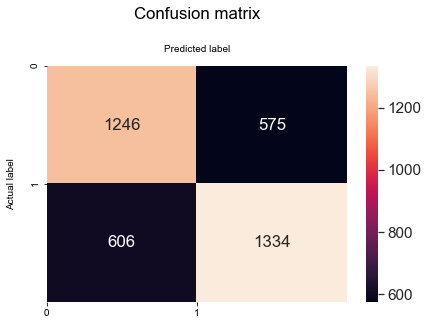

<IPython.core.display.Javascript object>

In [84]:
cm = confusion_matrix(y_test1, y_pred)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(28, 20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt="g")
class_names = [0, 1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title("Confusion matrix\n", y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel("Actual label\n")
plt.xlabel("Predicted label\n")

## Constraints and future improvements

###  Constraints
- Due to limit of time, we cannot try different methods in dealing with imbalanced data. After undersampling, the size of data has been reduced a lot and this might make the model less predictive
- There are still a lot of features in the model, and we could not condense those into few of more meaningful ones. We tried PCA to reduce the dimension of the data, but the performance is not so good. 

### Future improvements
- Trying different methd to deal with imbalanced data
- Improving feature engineering part

# Predicting for the test set - Applying model

## Data test information

In [85]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     4500 non-null   int64  
 1   avg_time_charging_lag1       4500 non-null   float64
 2   avg_time_charging_lag2       4500 non-null   float64
 3   avg_time_charging_lag3       4500 non-null   float64
 4   avg_time_charging_lag7       4497 non-null   float64
 5   charging_rate_lag3           4500 non-null   float64
 6   charging_rate_lag7           4499 non-null   float64
 7   avg_time_discharging_lag1    4500 non-null   float64
 8   avg_time_discharging_lag2    4500 non-null   float64
 9   avg_time_discharging_lag3    4500 non-null   float64
 10  avg_time_discharging_lag7    4497 non-null   float64
 11  discharging_rate_lag3        4500 non-null   float64
 12  discharging_rate_lag7        4499 non-null   float64
 13  charge_cycle_time_

<IPython.core.display.Javascript object>

In [86]:
data_test["LastRecord"] = pd.to_datetime(data1["LastRecord"])
data_test["Date Deployed"] = pd.to_datetime(data1["Date Deployed"])
# Calculating time of the devices since deployed
data_test["device_life"] = data_test["LastRecord"] - data_test["Date Deployed"]
data_test["device_life"] = data_test["device_life"].astype("timedelta64[D]")

# Calculating total_off_time/device_life since the day deployed
data_test["time_off_life"] = data_test["total_off_time"] / data2["device_life"]

<IPython.core.display.Javascript object>

In [87]:
data_test2 = data_test.copy()
missing_values1a = data_test2.isna().sum()
missing_values2a = data_test2.isna().sum() / len(data_test2) * 100
df1 = pd.concat([missing_values1a, missing_values2a], axis=1)
missing_table1 = df1.rename(columns={0: "Missing Values", 1: "% of Total Values"})
missing_table3 = (
    missing_table1[missing_table1.iloc[:, :] != 0]
    .sort_values("% of Total Values", ascending=False)
    .round(1)
)
miss_tbl2 = missing_table3.dropna()
miss_tbl2

,Missing Values,% of Total Values
avg_time_discharging_lag14,787.0,17.5
avg_time_charging_lag14,787.0,17.5
avg_time_discharging_lag13,528.0,11.7
avg_time_charging_lag13,528.0,11.7
avg_time_discharging_lag12,322.0,7.2
avg_time_charging_lag12,322.0,7.2
avg_time_charging_lag11,182.0,4.0
avg_time_discharging_lag11,182.0,4.0
avg_time_charging_lag10,103.0,2.3
avg_time_discharging_lag10,103.0,2.3


<IPython.core.display.Javascript object>

In [88]:
# Filling missing values of the rest
for col in list(miss_tbl2.index):
    # Impute with the median values
    data_test2[col] = data_test2[col].fillna(data_test[col].median())

<IPython.core.display.Javascript object>

In [89]:
data_test1 = data_test2.copy()

<IPython.core.display.Javascript object>

In [90]:
columnsToEncode1 = data_test1.select_dtypes(include=[bool]).columns
X_ = pd.get_dummies(data_test1, columns=columnsToEncode, drop_first=True)

<IPython.core.display.Javascript object>

In [91]:
data_test3 = X_.copy()

<IPython.core.display.Javascript object>

In [92]:
sc_X = sc.fit_transform(data_test3[cols_to_scale])
sc_X = pd.DataFrame(data=sc_X, columns=cols_to_scale)
sc_X = pd.concat(
    [sc_X, data_test3["charge_cycle_time_below_12_True"].reset_index()], axis=1
).drop("index", axis=1)

<IPython.core.display.Javascript object>

In [93]:
# Fitting RandomForest to the Training set
classifier = RandomForestClassifier(
    n_estimators=72, criterion="entropy", random_state=0
)
classifier.fit(sc_X_train, y_train1)
y_pred = classifier.predict(sc_X)

<IPython.core.display.Javascript object>

In [94]:
prediction = pd.DataFrame(data=y_pred)
id = data_test2["deviceid"]

<IPython.core.display.Javascript object>

In [95]:
result = pd.concat([id, prediction], axis=1).rename(columns={0: "Prediction"})

<IPython.core.display.Javascript object>

In [96]:
result.to_csv("D:/Pitney Bowes/Baurch Data Challenge 2022/test_result.csv", index=False)

<IPython.core.display.Javascript object>